In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('Cardiotocographic.csv')
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [5]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [7]:
df.isnull().sum()

,0
LB,21
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


In [9]:
df.size

29764

In [11]:
df.fillna(df.mean(), inplace=True)
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [13]:
# To ensure the correct data types
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
            print(f"Converted {col} to numeric type.")
        except:
            pass

In [16]:
# Detection of Outlilers (Using IQR Method):
num_cols = df.select_dtypes(include=['int64','float64']).columns
num_cols

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

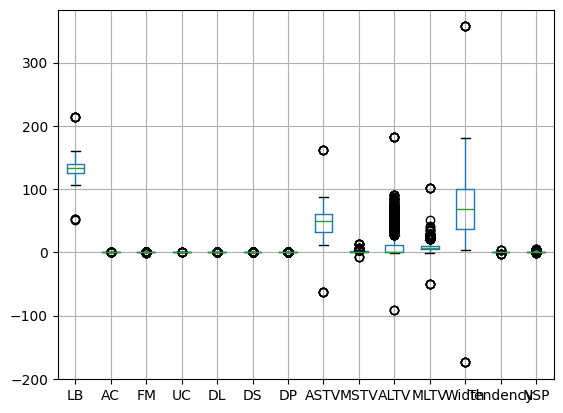

In [18]:
df.boxplot()
plt.show()

In [19]:
## Outlier_capping using IQR
## Preffered methodology for better accuracy than the z_capping method
def Outlier_capping(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR
  df[column]=df[column].apply(lambda x:lower_limit if x<lower_limit else upper_limit if x>upper_limit else x)
for col in df.select_dtypes(['int','float']).columns:
  Outlier_capping(df,col)

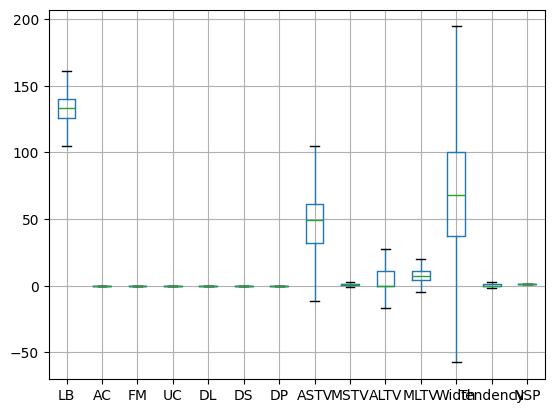

In [20]:
df.boxplot()
plt.show()

In [23]:
print('Insights:')
print('1. Outliers indicate extreme measurements (possibly rare fetal conditions.')
print('2. We typically keep them for medical data unless proven to be data entry errors.')

Insights:
1. Outliers indicate extreme measurements (possibly rare fetal conditions.
2. We typically keep them for medical data unless proven to be data entry errors.


In [25]:
stat_summary = df.describe().T
stat_summary

,count,mean,std,min,25%,50%,75%,max
LB,2126.0,133.293725,9.930227,105.000000,126.000000,133.000000,140.000000,161.000000
AC,2126.0,0.003147,0.003826,-0.008409,0.000000,0.001668,0.005606,0.014015
FM,2126.0,0.001568,0.002485,-0.003850,0.000000,0.000000,0.002567,0.006416
UC,2126.0,0.004362,0.003001,-0.005177,0.001851,0.004484,0.006536,0.013564
DL,2126.0,0.001770,0.002668,-0.004934,0.000000,0.000000,0.003289,0.008224
DS,2126.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DP,2126.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ASTV,2126.0,46.981873,17.612745,-11.500000,32.000000,49.000000,61.000000,104.500000
MSTV,2126.0,1.304644,0.781091,-0.800000,0.700000,1.200000,1.700000,3.200000
ALTV,2126.0,6.691678,10.378400,-16.500000,0.000000,0.000000,11.000000,27.500000


In [28]:
median = df.median()
median

,0
LB,133.000000
AC,0.001668
FM,0.000000
UC,0.004484
DL,0.000000
DS,0.000000
DP,0.000000
ASTV,49.000000
MSTV,1.200000
ALTV,0.000000


In [30]:
IQR = df.quantile(0.75) - df.quantile(0.25)
IQR


,0
LB,14.000000
AC,0.005606
FM,0.002567
UC,0.004685
DL,0.003289
DS,0.000000
DP,0.000000
ASTV,29.000000
MSTV,1.000000
ALTV,11.000000


In [34]:
combined_stats = pd.DataFrame({
    'mean': stat_summary['mean'],
    'median': median, # using the pre-calculated median Series
    'std': stat_summary['std'],
    'IQR': IQR # using the pre-calculated IQR Series
})
print(combined_stats)

                mean      median        std        IQR
LB        133.293725  133.000000   9.930227  14.000000
AC          0.003147    0.001668   0.003826   0.005606
FM          0.001568    0.000000   0.002485   0.002567
UC          0.004362    0.004484   0.003001   0.004685
DL          0.001770    0.000000   0.002668   0.003289
DS          0.000000    0.000000   0.000000   0.000000
DP          0.000000    0.000000   0.000000   0.000000
ASTV       46.981873   49.000000  17.612745  29.000000
MSTV        1.304644    1.200000   0.781091   1.000000
ALTV        6.691678    0.000000  10.378400  11.000000
MLTV        8.016212    7.500000   5.046784   6.200000
Width      70.321076   68.000000  39.570633  63.000000
Tendency    0.319662    0.000000   0.621602   1.000000
NSP         1.000000    1.000000   0.000000   0.000000


In [37]:
print('''Insights:
1. Mean vs. Median difference shows skewness.
2. High std or IQR means more variability.
3. In medical datasets, high variability can suggest differing patient conditions.''')

Insights:
1. Mean vs. Median difference shows skewness.
2. High std or IQR means more variability.
3. In medical datasets, high variability can suggest differing patient conditions.


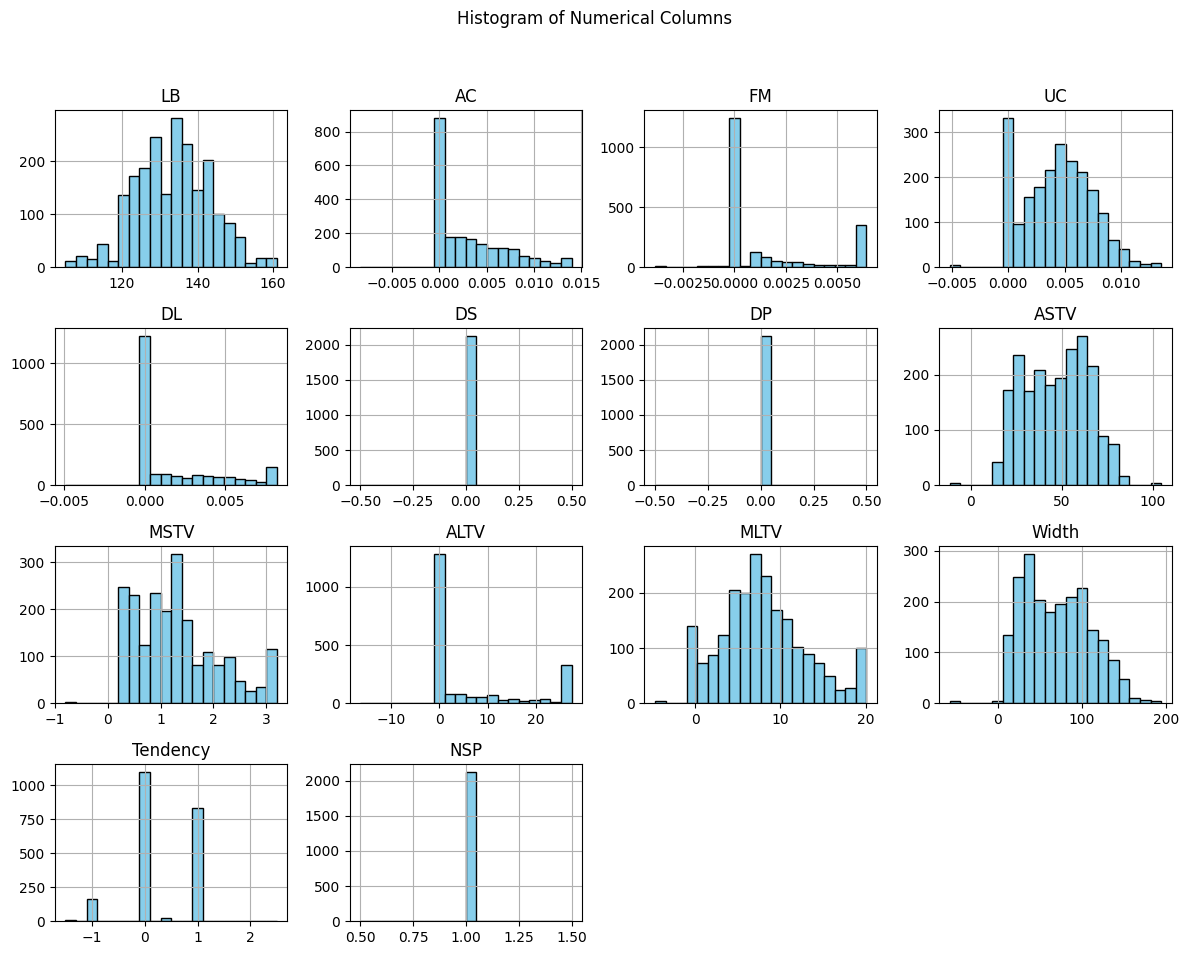

In [44]:
# Histogram for Numerical Columns
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histogram of Numerical Columns") # Use suptitle for overall title
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()

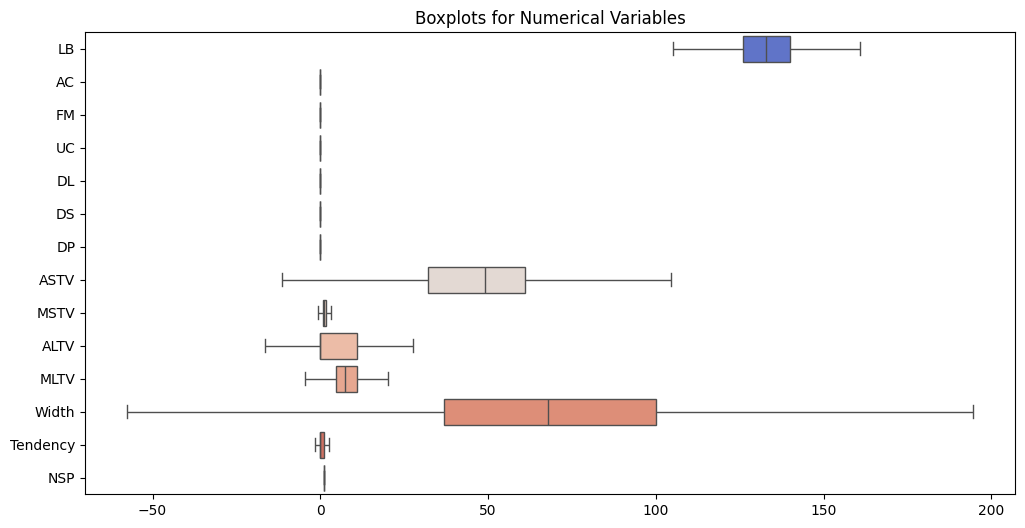

In [41]:
# Boxplots to Identify Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols], orient='h', palette="coolwarm")
plt.title("Boxplots for Numerical Variables")
plt.show()

In [43]:
print(''' Insights:
1. Outliers beyond whiskers could represent abnormal readings.
2. Important in health data — may indicate fetal distress''')

 Insights:
1. Outliers beyond whiskers could represent abnormal readings.
2. Important in health data — may indicate fetal distress


In [45]:
#Bar charts or pie charts for categorical variables
cat_cols = df.select_dtypes(include=['object']).columns
if len(cat_cols) > 0:
    for col in cat_cols:
        plt.figure(figsize=(6, 4))
        df[col].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
        plt.title(f"Category Frequency for {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()
else:
    print("No categorical columns found.")


No categorical columns found.


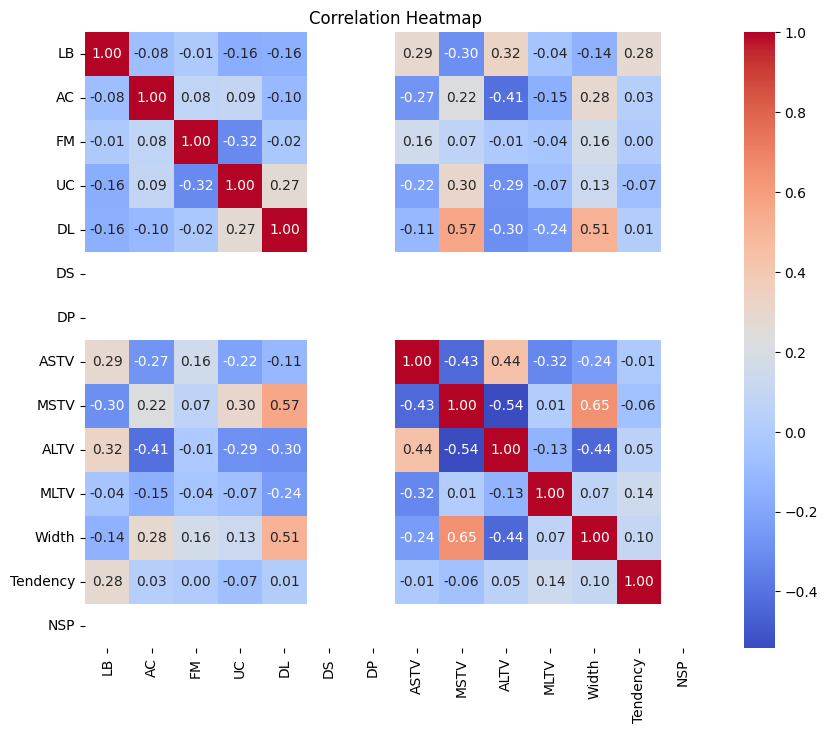

In [49]:
# Heatmap for understanding the correlation between the columns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title ("Correlation Heatmap")
plt.show()

In [53]:
# Pattern Recognition
# a. Correlational analysis
corr_matrix = df.corr()
high_corr = corr_matrix[(corr_matrix > 0.7) & (corr_matrix < 1)]
print("\n High Correlation Matrix (>0.7):")
print(high_corr.dropna(how='all').dropna(axis=1, how='all'))


 High Correlation Matrix (>0.7):
Empty DataFrame
Columns: []
Index: []


In [54]:
# b. Trend Analysis
if 'Date' in df.columns or 'Time' in df.columns:
    print('\nDetect time-based column detected, analysing trends,.....')
else:
    print('\nNo time-based column detected, skipping trend analysis.')


No time-based column detected, skipping trend analysis.


In [55]:
print('''Insights:
1. Correlated variables indicate dependent physiological measures.
2. In fetal monitoring, such correlations can help doctors identify stress conditions.
''')

Insights:
1. Correlated variables indicate dependent physiological measures.
2. In fetal monitoring, such correlations can help doctors identify stress conditions.



In [56]:
# Conclusion
print("""
1. Data cleaning ensured missing values, types, and outliers were handled properly.
2. Statistical summaries revealed variable ranges and central tendencies.
3. Visualizations identified distributions, outliers, and correlations.
4. High correlations suggest interdependent physiological measures.
5. These findings can support medical decision-making — for instance,
   identifying fetal distress patterns or guiding feature selection for ML models.
""")



1. Data cleaning ensured missing values, types, and outliers were handled properly.
2. Statistical summaries revealed variable ranges and central tendencies.
3. Visualizations identified distributions, outliers, and correlations.
4. High correlations suggest interdependent physiological measures.
5. These findings can support medical decision-making — for instance,
   identifying fetal distress patterns or guiding feature selection for ML models.

